In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('SP500ESGRiskRatings.csv')

In [3]:
df.shape

(503, 15)

In [4]:
df.head()

,Symbol,Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
0,ENPH,"Enphase Energy, Inc.","47281 Bayside Parkway\nFremont, CA 94538\nUnit...",Technology,Solar,"3,157","Enphase Energy, Inc., together with its subsid...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EMN,Eastman Chemical Company,"200 South Wilcox Drive\nKingsport, TN 37662\nU...",Basic Materials,Specialty Chemicals,"14,000",Eastman Chemical Company operates as a special...,25.30,12.80,6.60,5.80,Moderate Controversy Level,2.00,50th percentile,Medium
2,DPZ,Domino's Pizza Inc.,"30 Frank Lloyd Wright Drive\nAnn Arbor, MI 481...",Consumer Cyclical,Restaurants,"6,500","Domino's Pizza, Inc., through its subsidiaries...",29.20,10.60,6.30,12.20,Moderate Controversy Level,2.00,66th percentile,Medium
3,DAY,"Dayforce, Inc.","3311 East Old Shakopee Road\nMinneapolis, MN 5...",Technology,Software - Application,"9,084","Dayforce Inc., together with its subsidiaries,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DVA,Davita Inc.,"2000 16th Street\nDenver, CO 80202\nUnited States",Healthcare,Medical Care Facilities,"70,000",DaVita Inc. provides kidney dialysis services ...,22.60,0.10,8.40,14.10,Moderate Controversy Level,2.00,38th percentile,Medium


In [5]:
df.describe()

,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Score
count,430.00,430.00,430.00,430.00,403.00
mean,21.53,5.74,6.73,9.07,2.01
std,6.89,5.09,2.21,3.66,0.79
min,7.10,0.00,3.00,0.80,1.00
25%,16.40,1.80,5.30,6.70,1.00
50%,21.05,4.05,6.10,8.90,2.00
75%,26.00,8.95,7.67,11.20,2.00
max,41.70,25.00,19.40,22.50,5.00


In [6]:
df['ESG Risk Level'].value_counts()

ESG Risk Level
Low           187
Medium        184
High           50
Negligible      6
Severe          3
Name: count, dtype: int64

In [7]:
df.columns

Index(['Symbol', 'Name', 'Address', 'Sector', 'Industry',
       'Full Time Employees', 'Description', 'Total ESG Risk score',
       'Environment Risk Score', 'Governance Risk Score', 'Social Risk Score',
       'Controversy Level', 'Controversy Score', 'ESG Risk Percentile',
       'ESG Risk Level'],
      dtype='object')

In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [10]:
df['esg_risk_level'] = (
    df['esg_risk_level']
    .str.strip()
    .replace({'Negligible': 'Low', 'Severe': 'High'})
)

In [11]:
df.esg_risk_level.value_counts()

esg_risk_level
Low       193
Medium    184
High       53
Name: count, dtype: int64

In [12]:
with pd.option_context('display.max_colwidth', None):
    print(df.address.tail(10))

493                         5301 Stevens Creek Boulevard\nSanta Clara, CA 95051\nUnited States
494                                       1932 Wynnton Road\nColumbus, GA 31999\nUnited States
495                      4300 Wilson Boulevard\n11th Floor\nArlington, VA 22203\nUnited States
496                                 2485 Augustine Drive\nSanta Clara, CA 95054\nUnited States
497                                    345 Park Avenue\nSan Jose, CA 95110-2704\nUnited States
498                       1 Grand Canal Square\nGrand Canal Harbour\nDublin, D02 P820\nIreland
499                         1 North Waukegan Road\nNorth Chicago, IL 60064-6400\nUnited States
500             100 Abbott Park Road\nAbbott Park\nNorth Chicago, IL 60064-6400\nUnited States
501    11270 West Park Place\nSuite 170 PO Box 245008\nMilwaukee, WI 53224-9508\nUnited States
502                                        3M Center\nSaint Paul, MN 55144-1000\nUnited States
Name: address, dtype: object


In [13]:
df['location'] = df['address'].str.split('\n').str[-1]

In [14]:
df.location.value_counts()

location
United States     482
Ireland             9
Switzerland         4
United Kingdom      3
Bermuda             2
Netherlands         1
Canada              1
Name: count, dtype: int64

In [15]:
df.groupby('location')['esg_risk_level'].value_counts(normalize=True)

location        esg_risk_level
Bermuda         Low              0.50
                Medium           0.50
Canada          Low              1.00
Ireland         Low              0.75
                Medium           0.25
Netherlands     Low              1.00
Switzerland     Medium           0.67
                Low              0.33
United Kingdom  Low              0.50
                Medium           0.50
United States   Low              0.44
                Medium           0.43
                High             0.13
Name: proportion, dtype: float64

In [16]:
df['location_US'] = (df['location'] == 'United States').astype(int)

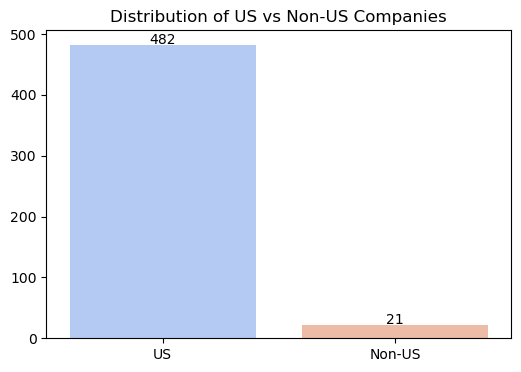

In [17]:
counts = df.location_US.value_counts()

plt.figure(figsize=(6,4))

ax = sns.barplot(
    x=['US', 'Non-US'],
    y=counts.values,
    palette='coolwarm'
)

for i, value in enumerate(counts.values):
    ax.text(i, value + 2, str(value), ha='center')

plt.title("Distribution of US vs Non-US Companies")
plt.show()

### Exploratory Data Analysis

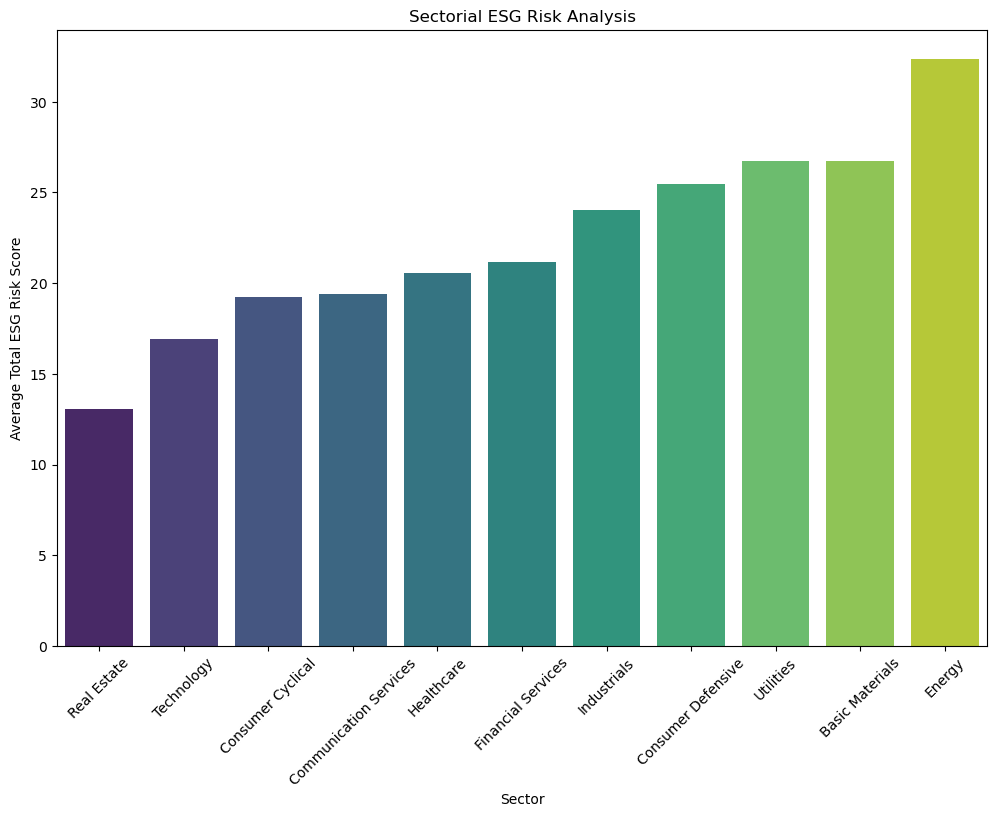

In [18]:
# BAR PLOT FOR SECTORIAL ESG RISK SCORE ANALYSIS

sectorial_risk = df.groupby('sector')['total_esg_risk_score'].mean().sort_values()

plt.figure(figsize=(12, 8))
sns.barplot(x=sectorial_risk.index, y=sectorial_risk.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Sectorial ESG Risk Analysis')
plt.xlabel('Sector')
plt.ylabel('Average Total ESG Risk Score')
plt.show()

Energy Sector has highest ESG Score. This means credit granting to industries in the energy sector requires stringent scrutiny.

In [20]:
df.dtypes

symbol                     object
name                       object
address                    object
sector                     object
industry                   object
full_time_employees        object
description                object
total_esg_risk_score      float64
environment_risk_score    float64
governance_risk_score     float64
social_risk_score         float64
controversy_level          object
controversy_score         float64
esg_risk_percentile        object
esg_risk_level             object
location                   object
location_US                 int64
dtype: object

In [21]:
df['full_time_employees'] = df['full_time_employees'].astype(str)
df['full_time_employees'] = df['full_time_employees'].str.replace(',', '')

df['full_time_employees'] = df['full_time_employees'].astype(float)

#### Investigating NULL Observations (MCAR, MAR, MNAR)

In [22]:
df.isnull().sum()

symbol                      0
name                        0
address                     1
sector                      1
industry                    1
full_time_employees         5
description                 1
total_esg_risk_score       73
environment_risk_score     73
governance_risk_score      73
social_risk_score          73
controversy_level          73
controversy_score         100
esg_risk_percentile        73
esg_risk_level             73
location                    1
location_US                 0
dtype: int64

In [23]:
null_percent = df.isnull().mean() * 100
null_percent

symbol                    0.00
name                      0.00
address                   0.20
sector                    0.20
industry                  0.20
full_time_employees       0.99
description               0.20
total_esg_risk_score     14.51
environment_risk_score   14.51
governance_risk_score    14.51
social_risk_score        14.51
controversy_level        14.51
controversy_score        19.88
esg_risk_percentile      14.51
esg_risk_level           14.51
location                  0.20
location_US               0.00
dtype: float64

###### CORRELATE MISSING OBSERVATIONS WITH NUMERIC COLUMNS

In [25]:
missing_mask = df.isna().astype(int)

missing_corr = missing_mask.corr()
print(missing_corr['total_esg_risk_score'])

symbol                    NaN
name                      NaN
address                  0.11
sector                   0.11
industry                 0.11
full_time_employees      0.02
description              0.11
total_esg_risk_score     1.00
environment_risk_score   1.00
governance_risk_score    1.00
social_risk_score        1.00
controversy_level        1.00
controversy_score        0.83
esg_risk_percentile      1.00
esg_risk_level           1.00
location                 0.11
location_US               NaN
Name: total_esg_risk_score, dtype: float64


Missing ESG risk score and risk level is perfectly correlated with environment_risk_score, governance_risk_score and social_risk_score. This may suggest that the missing observations most likely reflect firms without ESG ratings rather than random missingness. Missing At Random (MAR) is the most probable case for missingness. 

###### SECTORIAL INVESTIGATION OF MISSING OBSERVATIONS

In [28]:
df.groupby(df['total_esg_risk_score'].isna())['sector'].value_counts(normalize=True)

total_esg_risk_score  sector                
False                 Financial Services       0.15
                      Technology               0.14
                      Industrials              0.14
                      Healthcare               0.12
                      Consumer Cyclical        0.12
                      Consumer Defensive       0.08
                      Real Estate              0.07
                      Utilities                0.07
                      Energy                   0.05
                      Basic Materials          0.04
                      Communication Services   0.03
True                  Technology               0.21
                      Industrials              0.18
                      Healthcare               0.17
                      Communication Services   0.11
                      Consumer Cyclical        0.08
                      Utilities                0.06
                      Basic Materials          0.04
                   

In [31]:
df.groupby('sector')['total_esg_risk_score'].apply(lambda x: x.isna().mean())

sector
Basic Materials          0.14
Communication Services   0.36
Consumer Cyclical        0.11
Consumer Defensive       0.08
Energy                   0.09
Financial Services       0.05
Healthcare               0.18
Industrials              0.18
Real Estate              0.10
Technology               0.20
Utilities                0.12
Name: total_esg_risk_score, dtype: float64

Missing ESG risk scores and levels were sector-dependent, with Communication Services exhibiting the highest missing rate (36%) and Financial Services the lowest (5%). This suggests that ESG data availability is influenced by sector characteristics, consistent with a Missing At Random (MAR) mechanism likely driven by regulatory intensity and coverage bias.

Since, MAR applies to the missing observations. The observations will be dropped.

In [32]:
df.dropna(subset=['total_esg_risk_score'], inplace=True)

In [37]:
df.isnull().sum()

sector                    0
industry                  0
full_time_employees       0
total_esg_risk_score      0
environment_risk_score    0
governance_risk_score     0
social_risk_score         0
location_US               0
dtype: int64

In [36]:
cols_to_drop = [
    "symbol",
    "name",
    "address",
    "description",
    "location",
    "esg_risk_percentile",
    "esg_risk_level",
    "controversy_score",
    "controversy_level"
]

df = df.drop(columns=cols_to_drop, errors="ignore")

In [34]:
df['full_time_employees'] = df['full_time_employees'].fillna(df['full_time_employees'].median())

In [39]:
num_cols = ['full_time_employees', 'environment_risk_score', 'governance_risk_score', 'social_risk_score']
cat_cols = ['sector', 'industry']

###### CHECKING FOR OUTLIERS

In [38]:
df.describe()

,full_time_employees,total_esg_risk_score,environment_risk_score,governance_risk_score,social_risk_score,location_US
count,430.00,430.00,430.00,430.00,430.00,430.00
mean,62997.35,21.53,5.74,6.73,9.07,0.96
std,148612.55,6.89,5.09,2.21,3.66,0.20
min,163.00,7.10,0.00,3.00,0.80,0.00
25%,11227.75,16.40,1.80,5.30,6.70,1.00
50%,22834.00,21.05,4.05,6.10,8.90,1.00
75%,61324.00,26.00,8.95,7.67,11.20,1.00
max,2100000.00,41.70,25.00,19.40,22.50,1.00


In [40]:
from scipy import stats

z_scores = np.abs(stats.zscore(df[num_cols]))

outliers = (z_scores > 3)
print(np.sum(outliers, axis=0))

full_time_employees       3
environment_risk_score    4
governance_risk_score     5
social_risk_score         3
dtype: int64


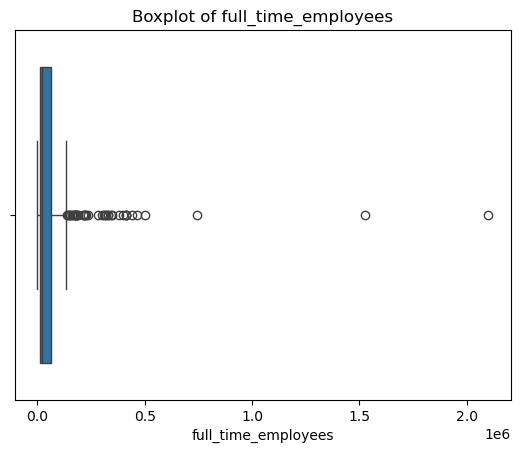

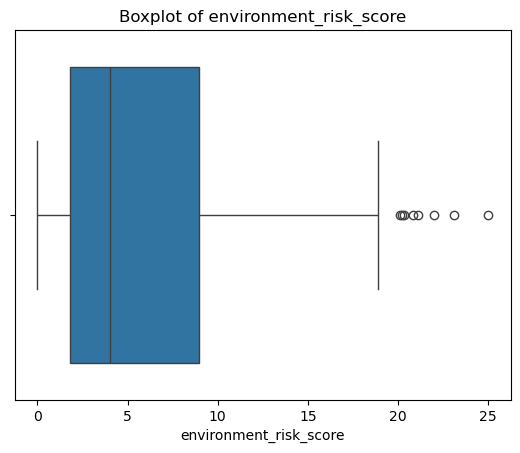

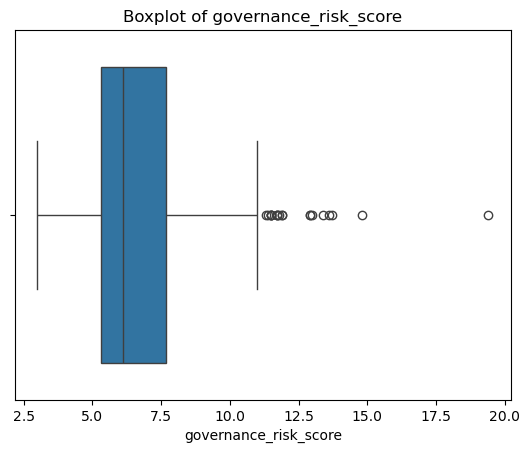

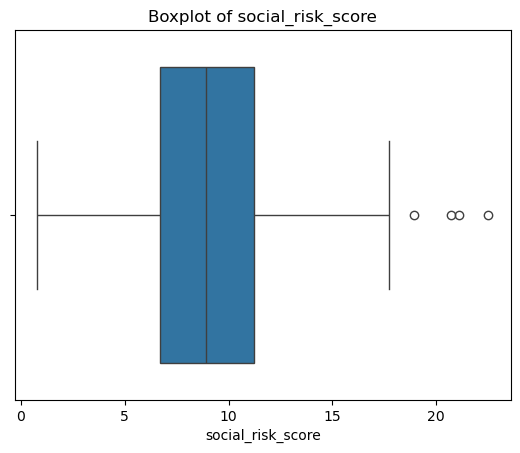

In [41]:
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

<Axes: xlabel='full_time_employees', ylabel='Count'>

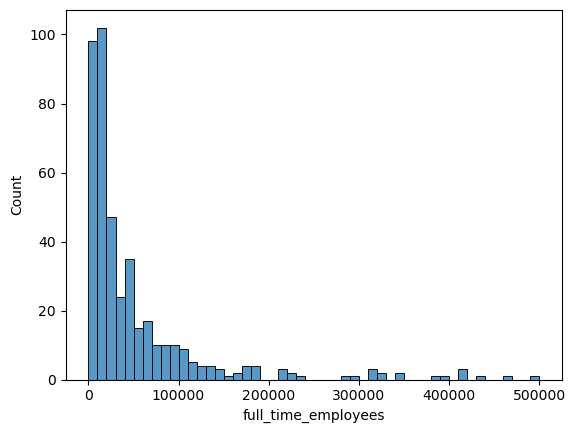

In [42]:
sns.histplot(df.full_time_employees[df.full_time_employees <= 500000] , bins=50)

full_time_employees is heavily right-skewed, log transformation will be applied

In [43]:
df['full_time_employees'] = np.log1p(df['full_time_employees'])

In [44]:
df.full_time_employees.describe()

count   430.00
mean     10.11
std       1.39
min       5.10
25%       9.33
50%      10.04
75%      11.02
max      14.56
Name: full_time_employees, dtype: float64

<Axes: xlabel='full_time_employees', ylabel='Count'>

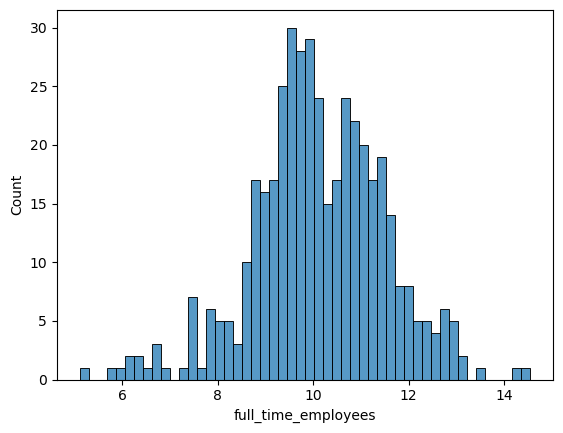

In [45]:
sns.histplot(df.full_time_employees, bins=50)

##### CHECKING IF ESG RISK LEVEL IS DERIVED FROM ENVIRONMENTAL, SOCIAL AND GOVERNANCE SCORES

In [ ]:
df.dtypes

In [47]:
df[['environment_risk_score',
    'governance_risk_score',
    'social_risk_score',
    'total_esg_risk_score']].corr()

,environment_risk_score,governance_risk_score,social_risk_score,total_esg_risk_score
environment_risk_score,1.00,-0.22,0.07,0.70
governance_risk_score,-0.22,1.00,0.36,0.35
social_risk_score,0.07,0.36,1.00,0.69
total_esg_risk_score,0.70,0.35,0.69,1.00
